<a href="https://colab.research.google.com/github/Omshreerh/Indegenous_News-Sentiment-Analysis/blob/main/News_Sentiment_Analysis_on_kw_'India'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing necessary packages and libraries***

In [22]:
!pip install newsapi-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import nltk
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

In [24]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [26]:
#We need the NewsApiClient library from newsapi
from newsapi import NewsApiClient
from datetime import date, timedelta, datetime

In [27]:
#We need SentimentIntensityAnalyser for sentiment analysis and sentiment score.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
model = SentimentIntensityAnalyzer()

In [28]:
#Setting max columnwidth so that all entries are seen upon running the program
pd.set_option('display.max_colwidth',1000)

***Getting the Access key from newsapi.org for getting access to the articles***

In [29]:
#This the the api key generated on the websit newsapi.org that is different for each user
key= '8732a13819724f58b4ab035370351393'

In [30]:
#We are looking to extract all articles that have the keyword 'INDIA' in them
newsapi = NewsApiClient(api_key= key)
keywrd = 'India'
my_date = date.today() - timedelta(days=1) 
articles = newsapi.get_everything(q = keywrd,from_param = my_date.isoformat(),to = (my_date + timedelta(days = 1)).isoformat(),language="en",sort_by="relevancy",page_size = 100)

In [31]:
articles

{'status': 'ok',
 'totalResults': 1038,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': None,
   'title': "Rahul Gandhi's cross-India march reaches capital city Delhi - Reuters India",
   'description': 'A cross-country march led by Indian opposition leader Rahul Gandhi reached the capital New Delhi on Saturday, hoping to regain some of the popularity it lost to the ruling Hindu-nationalist party.',
   'url': 'https://www.reuters.com/world/india/rahul-gandhis-cross-india-march-reaches-capital-city-delhi-2022-12-24/',
   'urlToImage': 'https://www.reuters.com/resizer/KA_hqhHKYoJuFuwjFBACRDgsfu4=/1200x628/smart/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/GOGLVOKR55PLPPVI3C3AMEOTSA.jpg',
   'publishedAt': '2022-12-24T09:39:00Z',
   'content': 'NEW DELHI, Dec 24 (Reuters) - A cross-country march led by Indian opposition leader Rahul Gandhi reached the capital New Delhi on Saturday, hoping to regain some of the popularity it lost to 

***Testing for a user given phrase***

In [13]:
Sentence = ['India claimed four wickets in Saturdays morning session to reduce Bangladesh to 71-4 on day three of the second test in Mirpur on Saturday.Zakir Hasan was batting on 37 with Bangladesh still 16 behind having conceded a first-innings lead of 87 in the second inning',\
           'Wow, how things change.',\
           'Find the top hits and fails of bollywood fashion',\
           'Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.']

for phrase in Sentence:
  print(f'{phrase}')
  print(model.polarity_scores(phrase))

India claimed four wickets in Saturdays morning session to reduce Bangladesh to 71-4 on day three of the second test in Mirpur on Saturday.Zakir Hasan was batting on 37 with Bangladesh still 16 behind having conceded a first-innings lead of 87 in the second inning
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Wow, how things change.
{'neg': 0.0, 'neu': 0.441, 'pos': 0.559, 'compound': 0.5859}
Find the top hits and fails of bollywood fashion
{'neg': 0.241, 'neu': 0.603, 'pos': 0.155, 'compound': -0.25}
Former DHS Secretary Janet Napolitano spoke with Yahoo Finance about comprehensive immigration reform.
{'neg': 0.0, 'neu': 0.857, 'pos': 0.143, 'compound': 0.25}


***Getting the articles with keyword India***

In [32]:
def get_sentiments(keywrd, startd, sources_list = None, show_all_articles = False):
   
  newsapi = NewsApiClient(api_key= key)
  if type(startd) == str:
    my_date = datetime.strptime(startd,'%d-%b-%Y')
  else:
    my_date = startd
  if sources_list:
    articles = newsapi.get_everything(q = keywrd,
                                      from_param = my_date.isoformat(), 
                                      to = (my_date + timedelta(days = 1)).isoformat(),
                                      language="en",
                                      sources = ",".join(sources_list),
                                      sort_by="relevancy",
                                      page_size = 100)
  else:
     articles = newsapi.get_everything(q = keywrd,
                                       from_param = my_date.isoformat(), 
                                       to = (my_date + timedelta(days = 1)).isoformat(),
                                       language="en",
                                       sort_by="relevancy",
                                       page_size = 100)
  article_content = ''

  date_sentiments = {}
  date_sentiments_list = []
  setting = set()
  
  for article in articles['articles']:
    if str(article['title']) in setting:
      continue
    else:
      setting.add(str(article['title']))
      article_content = str(article['title']) + '. ' + str(article['description'])      
      sentiment = model.polarity_scores(article_content)['compound']
      date_sentiments.setdefault(my_date, []).append(sentiment)
      date_sentiments_list.append((sentiment, article['url'],article['title'],article['description']))

  date_sentiments_l = sorted(date_sentiments_list, key=lambda tup: tup[0], reverse = True)   
  sent_list = list(date_sentiments.values())[0]

  return pd.DataFrame(date_sentiments_list, columns=['Sentiment','URL','Title','Description'])
     

    Sentiment  \
0      0.7845   
1      0.2023   
2     -0.7650   
3      0.0000   
4      0.1531   
..        ...   
95    -0.0772   
96     0.6124   
97     0.8885   
98    -0.8126   
99     0.8555   

                                                                                                                                                                                  URL  \
0                                                                          https://www.reuters.com/world/india/rahul-gandhis-cross-india-march-reaches-capital-city-delhi-2022-12-24/   
1                                                                      https://www.reuters.com/lifestyle/sports/india-tighten-grip-mirpur-after-bangladesh-top-order-wilt-2022-12-24/   
2                                                                    https://www.theguardian.com/world/2022/dec/25/threat-unity-anger-over-push-make-hindi-national-language-of-india   
3                                                      

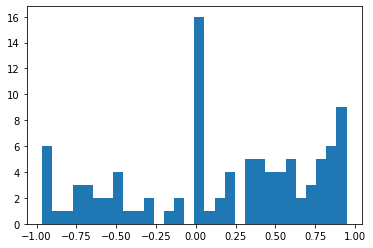

In [33]:
my_date = date.today() - timedelta(days=1) 

return_articles = get_sentiments(keywrd= 'India' ,startd = my_date, sources_list = None, show_all_articles= True)
return_articles.Sentiment.hist(bins=30, grid=False)
print(return_articles)

In [34]:
return_articles["Date"] = my_date

In [36]:
return_articles.sort_values(by='Sentiment', ascending=False)[['Sentiment','URL', 'Description','Title']].head(50)

,Sentiment,URL,Description,Title
18,0.9466,https://www.androidcentral.com/phones/poco-f4-gt-long-term-review,"POCO has a lot to offer with the F4 GT. The gaming phone has a vibrant screen, powerful hardware, and undercuts Xiaomi and Samsung devices by a considerable margin.",POCO F4 GT long-term review: This gaming phone is still a terrific value
77,0.9460,https://sports.ndtv.com/bangladesh-vs-india-2022-23/updated-world-test-championship-points-table-india-retain-second-spot-after-series-win-over-bangladesh-3636666,"<ol><li>Updated World Test Championship Points Table: India Retain Second Spot After Series Win Over Banglad.. NDTV Sports\r\n</li><li>Updated ICC World Test Championship Points Table After India vs Bangladesh 2nd Test, WTC Table Cricket Addictor\r\n</li><li>In…",Updated World Test Championship Points Table: India Retain Second Spot After Series Win Over Banglad.. - NDTV Sports
58,0.9313,https://www.icc-cricket.com/news/2992246,"<ol><li>India strengthen World Test Championship Final chances with series sweep over Bangladesh ICC Cricket\r\n</li><li>Updated ICC World Test Championship Points Table After India vs Bangladesh 2nd Test, WTC Table Cricket Addictor\r\n</li><li>Updated World Te…",India strengthen World Test Championship Final chances with series sweep over Bangladesh - ICC Cricket
47,0.9246,https://www.yourtango.com/2022356935/zodiac-signs-great-weekly-horoscopes-december-25-31-2022,"<ol><li>The 3 Zodiac Signs With Great Weekly Horoscopes For December 25 - 31, 2022 YourTango\r\n</li><li>Daily Horoscope: December 25, 2022 VICE\r\n</li><li>Horoscope Today: December 25, 2022 VOGUE India\r\n</li><li>The Love Horoscope For Each Zodiac Sign On Sun…","The 3 Zodiac Signs With Great Weekly Horoscopes For December 25 - 31, 2022 - YourTango"
72,0.9217,https://zeenews.india.com/cricket/ind-vs-ban-2nd-test-day-3-mohammed-siraj-says-this-about-team-indias-chances-of-winning-test-match-check-2553280.html,"<ol><li>We don`t need...: Mohammed Siraj says THIS about Team India`s chances of winning Test match - Check Zee News\r\n</li><li>Cricbuzz Chatter: 2nd Test, Day 3: Can #India still win the match vs #Bangladesh? Cricbuzz\r\n</li><li>PHOTOS: Mirpur Test set for a…",We don`t need...: Mohammed Siraj says THIS about Team India`s chances of winning Test match - Check - Zee News
66,0.9100,https://cricketaddictor.com/india-tour-of-bangladesh-2022/updated-icc-world-test-championship-points-table-after-india-vs-bangladesh-2nd-test-wtc-table/,"<ol><li>Updated ICC World Test Championship Points Table After India vs Bangladesh 2nd Test, WTC Table Cricket Addictor\r\n</li><li>World Test Championship Points Table update: India maintains 2nd spot after 2-0 win v Bangladesh; Final qualification scenarios …","Updated ICC World Test Championship Points Table After India vs Bangladesh 2nd Test, WTC Table - Cricket Addictor"
97,0.8885,https://www.hindustantimes.com/cricket/virender-sehwag-s-stunning-scientist-tweet-on-ashwin-perfectly-sums-up-india-great-s-match-winning-show-vs-bangladesh-101671952981450.html,"<ol><li>Sehwag's 'scientist' tweet on Ashwin perfectly sums up his match-winning show Hindustan Times\r\n</li><li>'Phenomenal' Shreyas Iyer calms the panic down with assured batting ESPNcricinfo\r\n</li><li>BAN vs IND: Lower order has saved India so many times,…",Sehwag's 'scientist' tweet on Ashwin perfectly sums up his match-winning show - Hindustan Times
24,0.8860,https://www.theguardian.com/lifeandstyle/2022/dec/24/expert-master-secrets-scrabble-sudoku-jenga-and-more,"From an 11-year old Scrabble prodigy to the UK jigsaw champion, we asked master gamers and puzzlers to reveal their secretsThe first time I speak to George Scholey this October, he is on the train to the UK Rubik’s Cube championships in Coventry. The 20-year-…","‘Dig deep and think as hard as possible’ – the secrets of success in Scrabble, Sudoku, Jenga and more"
14,0.8860,https://www.bbc.co.uk/sport/cricket/64089695,India win a nailbiter in Dhaka to beat Bangladesh 

***Sorting the articles in an ascending order of Sentiment score***

In [38]:
return_articles.sort_values(by='Sentiment', ascending=False)[['Sentiment','Title']].head(50)

,Sentiment,Title
18,0.9466,POCO F4 GT long-term review: This gaming phone is still a terrific value
77,0.9460,Updated World Test Championship Points Table: India Retain Second Spot After Series Win Over Banglad.. - NDTV Sports
58,0.9313,India strengthen World Test Championship Final chances with series sweep over Bangladesh - ICC Cricket
47,0.9246,"The 3 Zodiac Signs With Great Weekly Horoscopes For December 25 - 31, 2022 - YourTango"
72,0.9217,We don`t need...: Mohammed Siraj says THIS about Team India`s chances of winning Test match - Check - Zee News
66,0.9100,"Updated ICC World Test Championship Points Table After India vs Bangladesh 2nd Test, WTC Table - Cricket Addictor"
97,0.8885,Sehwag's 'scientist' tweet on Ashwin perfectly sums up his match-winning show - Hindustan Times
24,0.8860,"‘Dig deep and think as hard as possible’ – the secrets of success in Scrabble, Sudoku, Jenga and more"
14,0.8860,India hold nerve to beat Bangladesh in thriller
33,0.8689,President Murmu’s comments on affordable justice: Let’s begin by bringing down legal fees
